Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = {
    "Antonio Foglia": "af3152@columbia.edu",
    "Julia Moncayo Von Hase": "jm5005@columbia.edu"
    
}   

---

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length or less (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

# The project is not self contained!! Change the value below depending on preference (suggested: ```self_contained = True```).

The simulation data can be found in the **~/Project_data/sim_data** folder. A symlink was created in this directory.

In [3]:
self_contained = True

## Problem Description [15 pts]

In 2-4 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

YOUR ANSWER HERE

Our solar system is a complex and fascinating place. The bodies which populate it all move according to various laws of physics. One that stands out is Newton’s law of gravitation and the derived Kepler laws. In this project, we are going to explain how to use the initial Newton law $F = G \frac{m_1 m_2}{r^2}$ to get much more complex multi-body equations. We will then attempt to solve those equations using methods developed in class and successfully describe the motion of the planets in our solar system. We hope that through the project, we will be able to use the tools learned in the course to further analyze and solve relevant problems of our century and explain the world that surrounds us.

Using mathematical tools to solve real-world problems, especially concerning outer space and planetary motion is fascinating. Applying our knowledge and skills to a  problem of our interest will allow us to get a deeper understanding of mathematical concepts. Moreover, we are excited to use tools such as ODE IVPs and error analysis to implement an accurate solution to our problem. 

* The approach will be structured in the following way: 
    - Understand the problem and the relevant physical equations
    - Use the equations to set up a multibody system of equations that describe the motion of the planets
    - Source outside data and use it as initial values in our equations
    - Use computational tools (specifically ODE solvers) to solve our system of equations
    - Discuss results, errors, and stability

* Inspiration and References: 

    - We based our project on a paper entitled "The Equations of Planetary Motion and their Numerical Solution" by Jonathan Njeunje and Dinuka Sewwandi de Silva. The paper tackles the same problem as ours and outlines some useful computational methods for the solution of the equation. The authors opted for MATLAB as their computational tool. On our end, we aim to experiment with different methods to solve the same system of equations. Moreover, we will use python as our main computational tool. 
    - https://ssd.jpl.nasa.gov/horizons/app.html#/ 

* Sources link: 
    - http://www.wiu.edu/cas/mathematics_and_philosophy/graduate/equations-planetary-motion.pdf
    - https://ssd.jpl.nasa.gov/horizons/app.html#/ 

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

YOUR ANSWER HERE

Apart from being fascinating, it is very important to understand planetary motion since we should be more knowledgeable about the world we live in, including space. Understanding the motion of planets in the solar system is also crucial to understand how sunlight hits our planet. Sunlight is then responsible for countless events on our planet, from climate and seasons, to plant growth and sustainable energy production. Driven by our admiration of space and our willingness to find the solutions to equations that have a vast impact on our lives, we will be using mathematical tools to solve for the motion of the solar system’s planets.

## Computational  Methods [10 pts]

Briefly describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain how the methods work, but you should briefly justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



YOUR ANSWER HERE

1. Understand the problem and the relevant physical equations
2. Use the equations to set up a and IVP that describes the motion of the planets
3. Source outside data and use it as initial values in our equations
4. Solve the system using a modified version of the 4-step Runge-Kutta method
    - since every body's position will be dependent on the other bodies' positions, our Runge-Kutta mehod will need to be modified
5. Implement methods for error chaecking
6. Implement visualization methods using matplotlib

More details for choice of method will be outlined in the Implementation

In [4]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first code block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code. 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.

YOUR ANSWER HERE

## 1. Introduction


From Newton's Law of Gravitational Force, we get the following equations for the interaction of two bodies: 

$$F_m = G \frac{mM}{r^2}u_r \quad  and  \quad F_M = -G \frac{mM}{r^2}u_r$$

Where:
- $r$ is the distance between the two bodies
- $m$ & $M$ are the respective masses of the bodies
- $u_r$ is a unit vector in the direction of $m$ to $M$
- $G$ is the gravitational constant

In our project we will examine a Cartesian inertial system where two point masses $m$ and $m'$ have their coordinates: $x, y, z$ and $x', y', z'$. The distance between the two masses is $r$, so according to what we saw above, the forces felt by each mass are:

$$F = G \frac{mm'}{r^2} \quad and \quad F' = -G \frac{mm'}{r^2}$$

Now let's look at mass $m$ individually. Separating our forces in components of $F_x$, $F_y$ and $F_z$ we get: 

$$F_x = F \frac{x'-x}{r}$$
$$F_y = F \frac{y'-y}{r}$$
$$F_z = F \frac{z'-z}{r}$$

Netons law of dynamics also tells us that:

$$F_x = ma_x = m \frac{d^2x}{dt^2}$$
$$F_y = ma_y = m \frac{d^2y}{dt^2}$$
$$F_z = ma_z = m \frac{d^2z}{dt^2}$$

where $a_j$ is the accelleration in the $j$th direction.

If we combine the two sets of equations derived above, we arrive at the following:

$$\frac{d^2x}{dt^2} = Gm' \frac{x'-x}{r^3}$$
$$\frac{d^2y}{dt^2} = Gm' \frac{y'-y}{r^3}$$
$$\frac{d^2z}{dt^2} = Gm' \frac{z'-z}{r^3}$$

where $r$ is the distance between $m$ and $m'$.

## 2. Equation Setup

For a given body $\alpha$ with mass $m_{\alpha}$, the forces acting on it will be the sum of all forces generated by all other masses in the system: $m_1,m_2, ..., m_j$. Hence, we arrive at the following:


$$
\frac{d^2x_{\alpha}}{dt^2} = \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{x_j-x_{\alpha}}{(r_{j, \alpha})^3} \\
\frac{d^2y_{\alpha}}{dt^2} = \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{y_j-y_{\alpha}}{(r_{j, \alpha})^3} \\
\frac{d^2z_{\alpha}}{dt^2} = \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{z_j-z_{\alpha}}{(r_{j, \alpha})^3}
$$

with  $$r = \sqrt{(x_j-x_{\alpha})^2 + (y_j-y_{\alpha})^2+(z_j-z_{\alpha})^2}$$

For clarification:
* $nb$ - Number of bodies which we will be considering 
* $G$ - Constant of universal gravitation 
* $m_j$ - Mass of body $j $
* $r_{j, \alpha}$ - Distance between body $j$ and body $\alpha$
* $x_{\alpha}, y_{\alpha}, z_{\alpha}$ - Coordinates of body $\alpha$
* $x_j, y_j, z_j$ - Coordinates of body $j$ 

The above however is a complex 2nd order system of differential equations.
In order to be able to solve this problem more easily and with the methods available to us, we first have to convert it into an typycal initial value problem. 

$$U = \begin{bmatrix} x \\ y \\ z \\ v_x \\ v_y \\v_z \end{bmatrix} = \begin{bmatrix} x \\ y \\ z \\ \frac{dx}{dt}\\ \frac{dy}{dt}\\ \frac{dz}{dt} \end{bmatrix}$$

$$
\frac{dU}{dt} = F(t,U) \Rightarrow \frac{d}{dt} 
\begin{bmatrix} 
    x \\ 
    y \\ 
    z \\ 
    v_x \\ 
    v_y \\
    v_z 
\end{bmatrix} =
\begin{bmatrix}
    v_x \\ 
    v_y \\ 
    v_z \\ 
    \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{x_j-x_{\alpha}}{(r_{j, \alpha})^3} \\
    \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{y_j-y_{\alpha}}{(r_{j, \alpha})^3} \\
    \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{z_j-z_{\alpha}}{(r_{j, \alpha})^3} 
\end{bmatrix}
$$


Where number of bodies will be 9 as we can see below in our data section: 

## 3. Data import and manipulation

* **These are the bodies we will be analyzing:**
    - Sun
    - Mercury
    - Venus
    - Earth 
    - Mars
    - Jupiter
    - Saturn
    - Uranus
    - Neptune
    
* **This is the relevant data that we need for each body (we are assuming that each body is a point mass):**
    - coordinates: $(p_x, p_y, p_z)$ (units: m)
    - velocities: $(v_x, v_y, v_z)$ (units: m/s)
    - mass: $m_i$ (units: kg)
    
* **Comments:**
    - Coordinate Center: Solar System Barycenter
    - Time of sample: A.D. 2021-Dec-19 00:00:00.0000
    - Input data was in km and s hence notice the conversion in the function below
* **Source:**
    - https://ssd.jpl.nasa.gov/horizons/app.html#/ (Example query below, image might not render)

<img src="images/example-query.png" alt="IMG0" width="1000"/>

In [5]:
#main parameters
BODIES = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
DATE = '2021-Dec-19'
COORD_CENTRE = 'Solar System Barycenter'
PARAMETERS = ['$p_x$ (m)','$p_y$ (m)','$p_z$ (m)','$v_x$ (m/s)','$v_y$ (m/s)','$v_z$  (m/s)','$m$ (kg)']
MASS = {'Sun': 1988500*10e24, 
        'Mercury': 3.302*10e23, 
        'Venus': 48.685*10e23, 
        'Earth': 5.97219*10e24, 
        'Mars': 6.4171*10e23, 
        'Jupiter': 189818722*10e22, 
        'Saturn': 5.6834*10e26, 
        'Uranus': 86.813*10e24, 
        'Neptune': 102.409*10e24}

def data_sourcing(body,date):
    """
    Function to extract the data for a given celestial body from a downloaded txt file
    Source of file:
        - https://ssd.jpl.nasa.gov/horizons/app.html#/
    
    parameters:
    -----------
    
    body: string
        name of the body in question
    date: string
        date of the observation
        
    returns:
    --------
        res: array
            array of data in the following form: [px,py,pz,vx,vy,vz,m]
            where:
                - px,py,pz are the coordinates in m
                - vx,vy,vz are the compontents of the velocity in m/s
                - m is the mass of the body in kg
    """
    f = open("data/{}_horizons_results.txt".format(body), "r")
    data_found = 0
    res = []
    for line in f:
        if data_found == 2:
            x = line.index('X')
            y = line.index('Y')
            z =line.index('Z')
            res.append(float(line[x+3:y])*1000)
            res.append(float(line[y+3:z])*1000)
            res.append(float(line[z+3:])*1000)
            data_found += 1   
        elif data_found == 3:
            x = line.index('VX')
            y = line.index('VY')
            z =line.index('VZ')
            res.append(float(line[x+3:y])*1000)
            res.append(float(line[y+3:z])*1000)
            res.append(float(line[z+3:])*1000)
            break  
        if date in line:
            data_found += 1    
    res.append(MASS[body])       
    return res

#collect results
results = numpy.array([data_sourcing(i,DATE) for i in BODIES])
data = pd.DataFrame(results, columns=PARAMETERS, index=BODIES)

#show results
data.style.set_caption("Inital States on {}, coordinate centre: {}".format(DATE,COORD_CENTRE))

,$p_x$ (m),$p_y$ (m),$p_z$ (m),$v_x$ (m/s),$v_y$ (m/s),$v_z$ (m/s),$m$ (kg)
Sun,-1277005464.778503,517098609.101194,25608465.244146,-6.067412,-14.559946,0.257114,19885000000000001975887759147008.000000
Mercury,34508101132.244209,-52723448496.884682,-7607570006.459918,30705.450332,29541.091705,-401.601117,3301999999999999937085440.000000
Venus,27665774892.349960,104369263710.985001,-219158868.396066,-33858.321535,9217.415334,2080.407722,48685000000000004796186624.000000
Earth,6455658207.711240,147504822633.976898,18285998.711377,-30226.195085,1436.880113,-0.695286,59721900000000006053429248.000000
Mars,-153500890516.824615,-175014747408.840088,80887333.733328,19206.547275,-13813.815216,-760.227232,6417099999999999803916288.000000
Jupiter,690316174408.600342,-282290235855.156433,-14272946377.495989,4786.577297,12705.888148,-159.908766,18981872199999998328880351936512.000000
Saturn,1032777153150.338013,-1064210577763.859009,-22614868666.667938,6391.347269,6708.259391,-371.724051,5683399999999999618066677760.000000
Uranus,2157849440665.287109,2011656277113.735840,-20483973585.863228,-4693.689909,4663.946747,78.219369,868130000000000064671973376.000000
Neptune,4430992003685.073242,-617531964755.567261,-89399882714.603180,713.456310,5415.135611,-127.675626,1024090000000000187833516032.000000


## 4. Numerical Method implementation

We chose the Runge-Kutta Method since it approximates K only requiring 4 samples of f(t,u).

$$
\begin{align}
    K_1 &= \Delta t f(t_n, U_n) \\
    K_2 &= \Delta t f(t_n + \frac{\Delta t}{2}, U_n + \frac{K_1}{2}) \\
    K_3 &= \Delta t f(t_n + \frac{\Delta t}{2}, U_n + \frac{K_2}{2}) \\
    K_4 &= \Delta t f(t_n + \Delta, U_n + K_3) \\
    U_{n+1} &= U_n + \frac{1}{6}[K_1+ 2(K_2+K_3) + K_4]
\end{align}
$$

### 4.1 The RK4 function

In [6]:
def RK4(f, t_span, u0s, N, nb, G):
    """ 
    a constant step size ODE integrator using a 4-Stage Ruge-Kutta method
    
    parameters
    ----------
        fs: calleable
            vector valued function with interface f(t,u) where u is an array containing all state vectors for the bodies
        t_span: float list or array (or tuple)
            array holding range of times to integrate over t_span = [ t_min, t_max]
        u0s:  array of vectors
            array of initial condition vectors for each body
        N: integer
            size of each time step in seconds
        nb: int
            number of bodies to consider
        G: int
            gravitational constant
            
    returns:
    --------
        t: numpy array
            array of timesteps from t_min to t_max
        U: array
            solution array,  contains the state vector vor each body at each time step
    """
    
    t = numpy.arange(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    U = [u0s]
    
    for (n, t_n) in enumerate(t[:-1]):
        print(n, end='\r')
        
        #calculate K1s
        K1s = numpy.empty(U[n].shape)
        for a in range(nb):
            K1s[a] = delta_t * f(t_n, U[n], a)
        
        
        #calculate K2s 
        K2s = numpy.empty(U[n].shape)
        U_k2 = numpy.add(U[n],K1s/2.)
        for a in range(nb):
            K2s[a] = delta_t * f(t_n + delta_t/2., U_k2, a)
        
        #calculate K3s 
        K3s = numpy.empty(U[n].shape)
        U_k3 = numpy.add(U[n],K2s/2.)
        for a in range(nb):
            K3s[a] = delta_t * f(t_n + delta_t/2., U_k3, a)
        
        #calculate K4s 
        K4s = numpy.empty(U[n].shape)
        U_k4 = numpy.add(U[n],K3s)
        for a in range(nb):
            K4s[a] = delta_t * f(t_n + delta_t/2., U_k4, a)
        
        u_next = numpy.empty(U[n].shape)
        for a in range(nb):
            u_next[a] = U[n][a] +  1./6. * (K1s[a] + 2.*( K2s[a] + K3s[a]) + K4s[a])
   
        U.append(u_next)

    return t, U 

### 4.2 The RHS function

In [7]:
def F(t, u, alpha, nb, G):
    """ 
    RHS of our system of equations
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: array of vectors
            array containing vector states for all bodies at a give time
        alpha: int
            index of the body for which
        nb: int
            number of bodies to consider
        G: int
            gravitational constant
            
    returns:
    --------
        u_alpha: array
            the updated state vector for body alpha
    """
    
    vx = u[alpha][3]
    vy = u[alpha][4]
    vz = u[alpha][5]
    
    sum_x = 0
    sum_y = 0
    sum_z = 0
    
    for j in range(nb):
        if j != alpha:
            m = MASS[BODIES[j]]
            sum_x += G * m * (u[j][0]-u[alpha][0]) / ( r(j,alpha,u) ** 3 )
            sum_y += G * m * (u[j][1]-u[alpha][1]) / ( r(j,alpha,u) ** 3 )
            sum_z += G * m * (u[j][2]-u[alpha][2]) / ( r(j,alpha,u) ** 3 )
    
    u_alpha = numpy.array([vx,vy,vz,sum_x,sum_y,sum_z])
    return u_alpha

def r(j,a,u):
    """ 
    calculates distance between body alpha and body j
    
    parameters
    ----------
        j: int
            index of first body
        a: int
            index of body a
        u: array of vectors
            array containing vector states for all bodies at a give time
            
    returns:
    --------
        r: float
            distance between body j and body alpha
    """
    xj = u[j][0]
    yj = u[j][1]
    zj = u[j][2]
    xa = u[a][0]
    ya = u[a][1]
    za = u[a][2]
    
    r = numpy.sqrt( (xj-xa)**2 + (yj-ya)**2 + (zj-za)**2 ) 
    return r

## 5. Results

In [8]:
#make plotting functions

#plotting function 2D
def plot(u,nb):
    '''
    params
    ------
        u: array of arrays of vectors
            solution to our solver
        nb: int
            number of bodies
    
    returns:
    --------
        beautifully labelled plot!
    '''
    
    fig = plt.figure(figsize=(40,10))
    axes = fig.add_subplot(1,2,1)
    colors = ['y--','r--','b--','g--','k--','m--','c--','r--','b--']
    for body in range(nb):
            x = u[-1][body][0]
            y = u[-1][body][1]
            axes.plot(x,y,f'{colors[body]}o',label=BODIES[body])
            axes.text(x,y,'{}'.format(BODIES[body]),horizontalalignment='right')

            x = [time[body][0] for time in u]
            y = [time[body][1] for time in u]
            axes.plot(x,y,colors[body])


    axes.legend(loc='best',shadow=True, fontsize=14)
    axes.set_xlabel('x (m)',fontsize=16)
    axes.set_ylabel('y (m)',fontsize=16)
    axes.grid()
    axes.set_title('motion of planets and sun in the solar system',fontsize=18)
    plt.show()

#plotting function 3D
def plot3D(u,nb,a1=30,a2=30):
    '''
    params
    ------
        u: array of arrays of vectors
            solution to our solver
        nb: int
            number of bodies
        a1,a2: int
            angles to view the plot
    
    returns:
    --------
        beautifully labelled plot!
    '''
    
    fig = plt.figure(figsize=(40,10))
    axes = plt.axes(projection ='3d')
    colors = ['y--','r--','b--','g--','k--','m--','c--','r--','b--']
    for body in range(nb):
            x = u[-1][body][0]
            y = u[-1][body][1]
            z = u[-1][body][2]
            axes.plot(x,y,z,f'{colors[body]}o',label=BODIES[body])
            axes.text(x,y,z,'{}'.format(BODIES[body]),horizontalalignment='right')

            x = [time[body][0] for time in u]
            y = [time[body][1] for time in u]
            z = [time[body][2] for time in u]
            t = [i for i in range(len(u))]
            axes.plot(x,y,z,colors[body])


    axes.legend(loc='best',shadow=True, fontsize=14)
    axes.set_xlabel('x (m)',fontsize=16)
    axes.set_ylabel('y (m)',fontsize=16)
    axes.set_zlabel('z (m)',fontsize=16)
    axes.grid()
    axes.set_title('motion of planets and sun in the solar system 3D',fontsize=18)
    
   
    axes.view_init(a1, a2)
        
    plt.show()
    
#plotting function for a single planet
def show_planet(i,t,u,nb):
    '''
    function that shows the orbit for a planet in the given time frame
    
    
    params
    ------
        i: int 
            index of interest planet
        t: int
            [0,t] timeframe of plot
        u: array of arrays of vectors
            solution to our solver
        nb: int
            number of bodies
    returns:
    --------
        beautifully labelled plot!
    '''
    

    planet = i
    time = t

    fig = plt.figure(figsize=(40,10))
    axes = fig.add_subplot(1,2,1)
    
    x = u[-1][planet][0]
    y = u[-1][planet][1]
    axes.plot(x,y,'bo',label=BODIES[planet])
    axes.text(x,y,'{}'.format(BODIES[planet]),horizontalalignment='right')


    x = [time[planet][0] for time in u]
    y = [time[planet][1] for time in u]
    axes.plot(x[:time],y[:time],'b')


    axes.legend(loc='best',shadow=True, fontsize=14)
    axes.set_xlabel('x (m)',fontsize=16)
    axes.set_ylabel('y (m)',fontsize=16)
    axes.grid()
    axes.set_title('Motion of {} from t = 0s to t = {}s'.format(BODIES[planet],time),fontsize=18)
    plt.show()

### 5.1 Attempt in 3 Dimension

For this first attempt we run or model with all bodies.

#### 5.1.1 Run simulation for a short time

In [9]:
#define constants

BODIES = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
MASS = {'Sun': 1988500*10e24, 
        'Mercury': 3.302*10e23, 
        'Venus': 48.685*10e23, 
        'Earth': 5.97219*10e24, 
        'Mars': 6.4171*10e23, 
        'Jupiter': 189818722*10e22, 
        'Saturn': 5.6834*10e26, 
        'Uranus': 86.813*10e24, 
        'Neptune': 102.409*10e24}

G = 6.67*10e-11
nb = len(BODIES)
t_span = [0.,86400] #86400: one day in seconds
N = 1000

In [10]:
# Define u0 for 3-dimensions
u_0_3 = numpy.array([numpy.array(row[:-1]) for index, row in data.iterrows()])

# Define f
f = lambda t, u, a: F(t, u, a, nb, G)

#solve
t, u3D = RK4(f, t_span, u_0_3, N, nb, G)

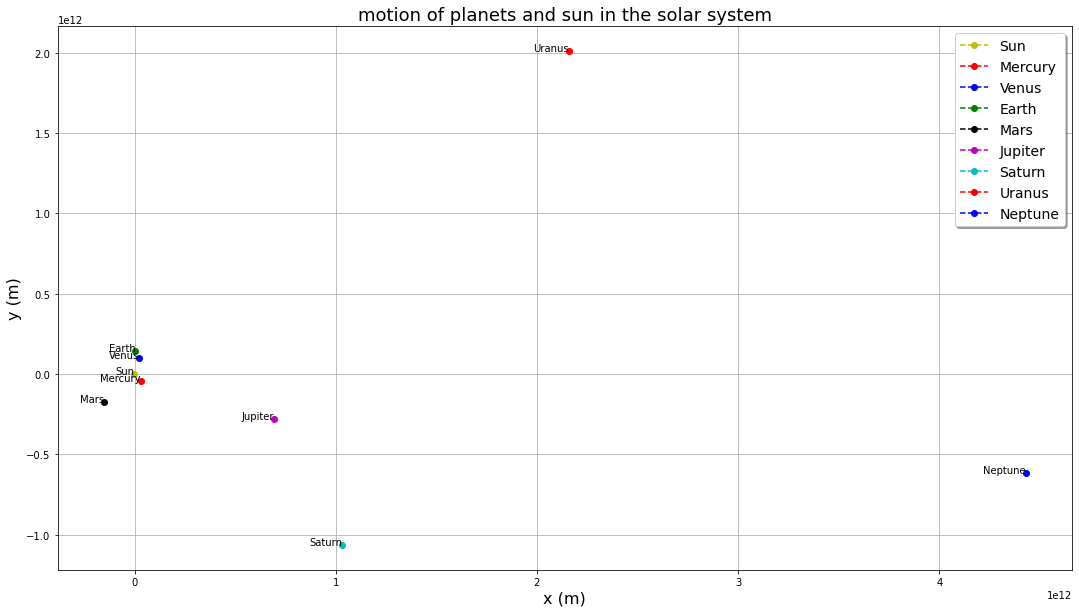

In [11]:
#plot
plot(u3D,nb)

As we can see, the movement for one day is extremely minuscule when the whole solar system is involved.

Let's zoom in on earth to see its movement.

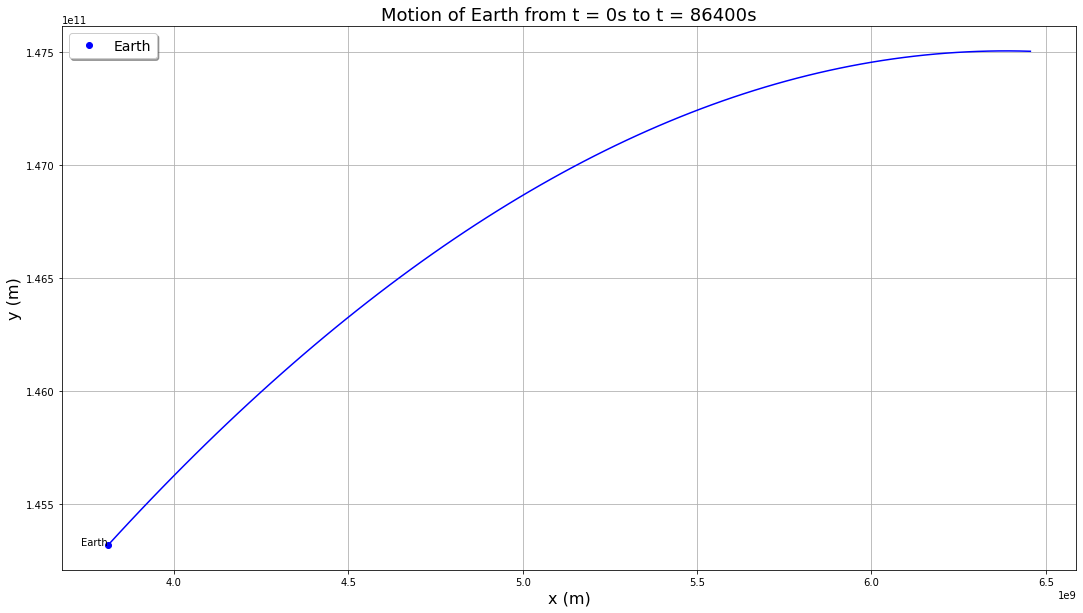

In [12]:
#looking at earth specifically:
show_planet(BODIES.index('Earth'),86400,u3D,nb)

The orbit for earth doesn't appear to be bad.

However, after playing with the above system with differnt time intervals we icountered inaccurate results and long computational times.

#### 5.1.2 Run simulation for a long time

We ran a simulation for 2 months at 1 second intervals. The computation took 9 hours, here we are just importing the data.

In [13]:
if not self_contained:
    
    #retrieve data 
    with open('sim_data/2-months-3D-all.npy', 'rb') as f:
        dt = numpy.load(f)
        
    #define main variables
    BODIES = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
    nb = len(BODIES)
    
    #plot (doesn't always work because of amount of data)
    plot(dt,nb)

If the above does not work becaus of eccessively large dataset, this is the supposed output:

<img src="images/2-months-2D-all.png" alt="IMG1" width="1000"/>

In [14]:
if  not self_contained:

    #plot planets except mars
    u = dt.copy()
    fig = plt.figure(figsize=(40,10))
    axes = fig.add_subplot(1,2,1)
    colors = ['y--','r--','b--','g--','k--','m--','c--','r--','b--']
    for body in range(nb):
        if BODIES[body] not in ['Mars','Uranus','Neptune']:
            x = u[-1][body][0]
            y = u[-1][body][1]
            axes.plot(x,y,f'{colors[body]}o',label=BODIES[body])
            axes.text(x,y,'{}'.format(BODIES[body]),horizontalalignment='right')

            x = [time[body][0] for time in u]
            y = [time[body][1] for time in u]
            axes.plot(x,y,colors[body])


    axes.legend(loc='best',shadow=True, fontsize=14)
    axes.set_xlabel('x (m)',fontsize=16)
    axes.set_ylabel('y (m)',fontsize=16)
    axes.grid()
    axes.set_title('motion of planets and sun in the solar system',fontsize=18)
    plt.show()

If the above does not work becaus of eccessively large dataset, this is the supposed output:

<img src="images/2-months-2D-no-mars.png" alt="IMG2" width="1000"/>

In [16]:
if not self_contained:
    
    #plot inner planets in 3D
    fig = plt.figure(figsize=(40,10))
    axes = plt.axes(projection ='3d')
    colors = ['y--','r--','b--','g--','k--','m--','c--','r--','b--']
    for body in range(nb):
        if BODIES[body] not in ['Mars','Uranus','Neptune','Venus','Saturn']:
            x = u[-1][body][0]
            y = u[-1][body][1]
            z = u[-1][body][2]
            axes.plot(x,y,z,f'{colors[body]}o',label=BODIES[body])
            axes.text(x,y,z,'{}'.format(BODIES[body]),horizontalalignment='right')

            x = [time[body][0] for time in u]
            y = [time[body][1] for time in u]
            z = [time[body][2] for time in u]
            t = [i for i in range(len(u))]
            axes.plot(x,y,z,colors[body])


    axes.legend(loc='best',shadow=True, fontsize=14)
    axes.set_xlabel('x (m)',fontsize=16)
    axes.set_ylabel('y (m)',fontsize=16)
    axes.set_zlabel('z (m)',fontsize=16)
    axes.grid()
    axes.set_title('motion of planets and sun in the solar system 3D',fontsize=18)


    axes.view_init(30, 30)

    plt.show()

If the above does not work becaus of eccessively large dataset, this is the supposed output:

<img src="images/2-months-3D-inner.png" alt="IMG3" width="700"/>

#### 5.1.3 Physics analysis

A way to understand why our system is not working is to do a energy conservation analysis. At each time step, a body's energy is given by the sum of its kinetick energy $\frac{1}{2}mv^2$ and its gravitational potential energy ($ - \frac{Gm_1m_2}{r}$) with respect to all other bodies: $- \sum_{j=1, j \neq \alpha}^{nb} G \frac{m_jm_\alpha}{r_{j, \alpha}}$. 

We will implement our F2D to also output the energy of the system at each time step.

In [18]:
def RK4_energy(f, t_span, u0s, N, nb, G):
    """ 
    a constant step size ODE integrator using a 4-Stage Ruge-Kutta method
    
    parameters
    ----------
        fs: calleable
            vector valued function with interface f(t,u) where u is an array containing all state vectors for the bodies
        t_span: float list or array (or tuple)
            array holding range of times to integrate over t_span = [ t_min, t_max]
        u0s:  array of vectors
            array of initial condition vectors for each body
        N: integer
            size of each time step in seconds
        nb: int
            number of bodies to consider
        G: int
            gravitational constant
            
    returns:
    --------
        t: numpy array
            array of timesteps from t_min to t_max
        U: array
            solution array,  contains the state vector vor each body at each time step
        E: array
            array of total system energy at each time step
    """
    
    t = numpy.arange(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    U = [u0s]
    E = [energy(u0s,nb,G)]
    
    for (n, t_n) in enumerate(t[:-1]):
        print(n, end='\r')
        
        #calculate K1s
        K1s = numpy.empty(U[n].shape)
        for a in range(nb):
            K1s[a] = delta_t * f(t_n, U[n], a)
        
        
        #calculate K2s 
        K2s = numpy.empty(U[n].shape)
        U_k2 = numpy.add(U[n],K1s/2.)
        for a in range(nb):
            K2s[a] = delta_t * f(t_n + delta_t/2., U_k2, a)
        
        #calculate K3s 
        K3s = numpy.empty(U[n].shape)
        U_k3 = numpy.add(U[n],K2s/2.)
        for a in range(nb):
            K3s[a] = delta_t * f(t_n + delta_t/2., U_k3, a)
        
        #calculate K4s 
        K4s = numpy.empty(U[n].shape)
        U_k4 = numpy.add(U[n],K3s)
        for a in range(nb):
            K4s[a] = delta_t * f(t_n + delta_t/2., U_k4, a)
        
        u_next = numpy.empty(U[n].shape)
        for a in range(nb):
            u_next[a] = U[n][a] +  1./6. * (K1s[a] + 2.*( K2s[a] + K3s[a]) + K4s[a])
        
        E.append(energy(u_next,nb,G))
        U.append(u_next)

    return t, U , E

In [19]:
def energy(u, nb, G):
    """ 
    calculates energy for all bodies at a time interval
    
    parameters
    ----------
        u: array of vectors
            array containing vector states for all bodies at a give time
        nb: int
            number of bodies to consider
        G: int
            gravitational constant
            
    returns:
    --------
        e: array
            array of energy for each body at a given time
    """
    
    e = []
    
    for a in range(nb):
        e_a = 0
        
        vx = u[a][3]
        vy = u[a][4]
        vz = u[a][5]
        ma = MASS[BODIES[a]]
        
        #kinetic energy
        e_a += 1/2 * ma * ( numpy.sqrt( vx**2 + vy**2 + vz**2 ) ) **2
        
        #gravitational potential
        sum_a = 0
        for j in range(nb):
            if j != a:
                mj = MASS[BODIES[j]]
                sum_a += G * ( mj * ma ) / r(j,a,u) 
        e_a -= sum_a
        
        e.append(e_a)
   
    return e

In [20]:
#define constants

BODIES = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
MASS = {'Sun': 1988500*10e24, 
        'Mercury': 3.302*10e23, 
        'Venus': 48.685*10e23, 
        'Earth': 5.97219*10e24, 
        'Mars': 6.4171*10e23, 
        'Jupiter': 189818722*10e22, 
        'Saturn': 5.6834*10e26, 
        'Uranus': 86.813*10e24, 
        'Neptune': 102.409*10e24}

G = 6.67*10e-11
nb = len(BODIES)
t_span = [0.,86400] #86400: one day in seconds
N = 100

In [21]:
# Define u0 for 3-dimensions
u_0_3 = numpy.array([numpy.array(row[:-1]) for index, row in data.iterrows()])

# Define f
f = lambda t, u, a: F(t, u, a, nb, G)

#solve
t, u3D, e3D = RK4_energy(f, t_span, u_0_3, N, nb, G)

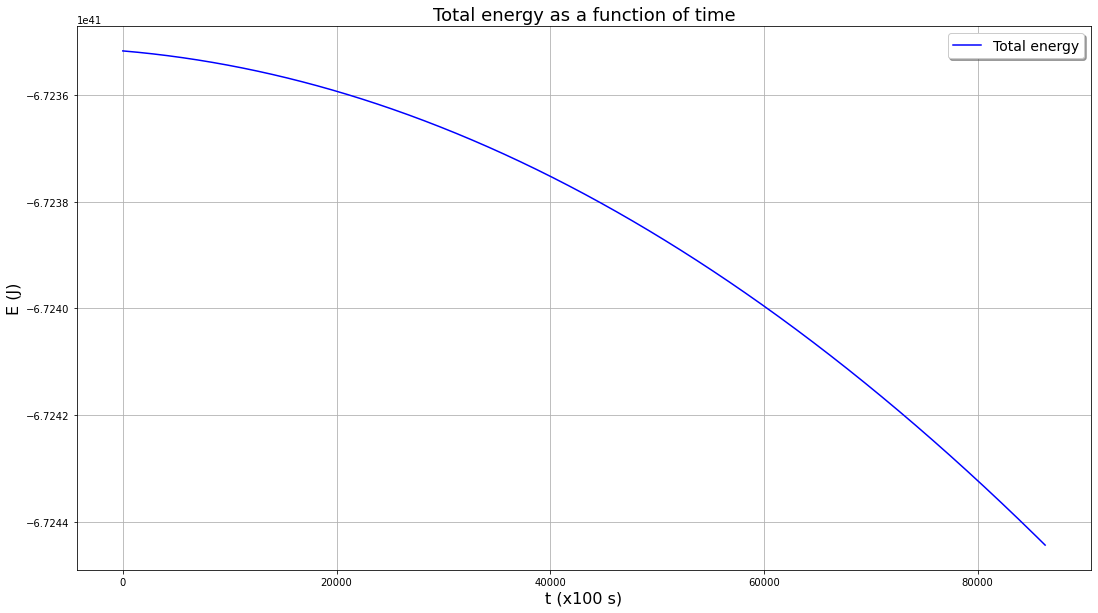

In [22]:
#plot energy as a function of time
fig = plt.figure(figsize=(40,10))
axes = fig.add_subplot(1,2,1)
axes.plot(t,[sum(e) for e in e3D],'b',label='Total energy')           
axes.legend(loc='best',shadow=True, fontsize=14)
axes.set_xlabel('t (x{} s)'.format(N),fontsize=16)
axes.set_ylabel('E (J)',fontsize=16)
axes.grid()
axes.set_title('Total energy as a function of time',fontsize=18)
plt.show()

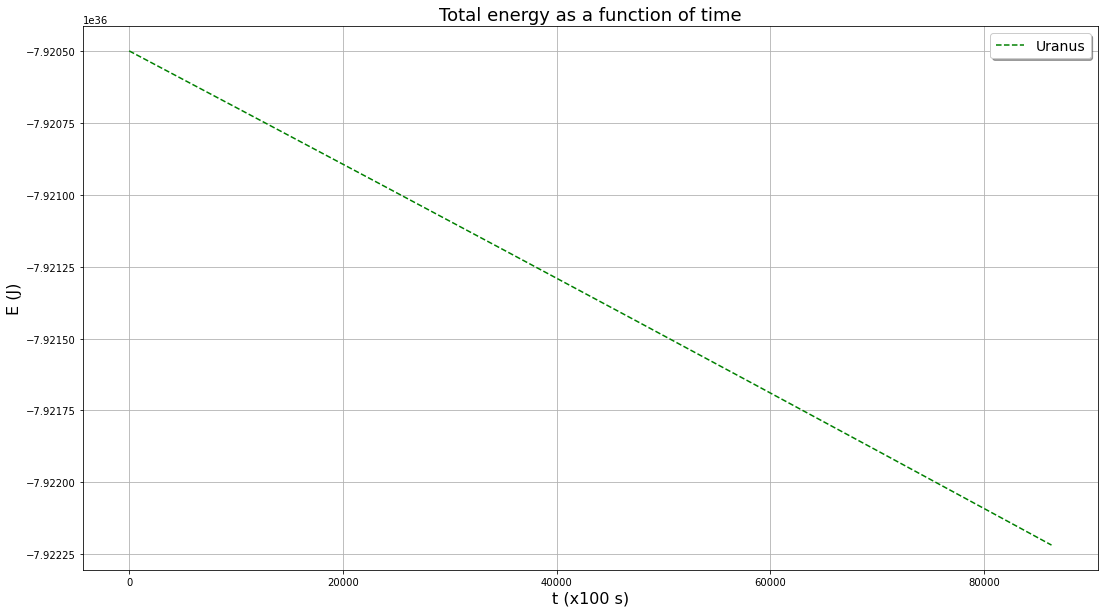

In [23]:
#plot energy as a function of time for a single planet
p = BODIES.index('Uranus')
fig = plt.figure(figsize=(40,10))
axes = fig.add_subplot(1,2,1)
axes.plot(t,[e[p] for e in e3D],'g--',label=BODIES[p] ) 
# colors = ['y--','r--','b--','g--','k--','m--','c--','r--','b--']
# for i in range(nb):
#         axes.plot(t,[e[i] for e in e3D],colors[i],label=BODIES[i] )  
axes.legend(loc='best',shadow=True, fontsize=14)
axes.set_xlabel('t (x{} s)'.format(N),fontsize=16)
axes.set_ylabel('E (J)',fontsize=16)
axes.grid()
axes.set_title('Total energy as a function of time',fontsize=18)
plt.show()

The total energy for the system is decreasing, which it shouldn't. However, the energy change is very small: in the $10^{-44}$ order.  See the below discussion for an insight on the issues.

### 5.2 Attempt in 2 Dimension

To simplify things, we run the model only considering two dimensions of the bodies' movement: $x$ and $y$. Hopefully this leads to better computational times and less errors.

These are the updated equations:

$$U = \begin{bmatrix} x \\ y \\ v_x \\ v_y \end{bmatrix} = \begin{bmatrix} x \\ y \\ \frac{dx}{dt}\\ \frac{dy}{dt} \end{bmatrix}$$

$$
\frac{dU}{dt} = F(t,U) \Rightarrow \frac{d}{dt} 
\begin{bmatrix} 
    x \\ 
    y \\
    v_x \\ 
    v_y 
\end{bmatrix} =
\begin{bmatrix}
    v_x \\ 
    v_y \\  
    \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{x_j-x_{\alpha}}{(r_{j, \alpha})^3} \\
    \sum_{j=1, j \neq \alpha}^{nb} Gm_j \frac{y_j-y_{\alpha}}{(r_{j, \alpha})^3} 
\end{bmatrix}
$$

with  $$r = \sqrt{(x_j-x_{\alpha})^2 + (y_j-y_{\alpha})^2}$$

In [25]:
#define 2D RHS function
def F2D(t, u, alpha, nb, G):
    """ 
    RHS of our system of equations for 2-dimensions
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: array of vectors
            array containing vector states for all bodies at a give time
        alpha: int
            index of the body for which
        nb: int
            number of bodies to consider
        G: int
            gravitational constant
            
    returns:
    --------
        u_alpha: array
            the updated state vector for body alpha
    """
    
    vx = u[alpha][2]
    vy = u[alpha][3]
    
    sum_x = 0
    sum_y = 0
    
    for j in range(nb):
        if j != alpha:
            m = MASS[BODIES[j]]
            sum_x += G * m * (u[j][0]-u[alpha][0]) / ( r2D(j,alpha,u) ** 3 )
            sum_y += G * m * (u[j][1]-u[alpha][1]) / ( r2D(j,alpha,u) ** 3 )
    
    u_alpha = numpy.array([vx,vy,sum_x,sum_y])
    return u_alpha

def r2D(j,a,u):
    """ 
    calculates distance between body alpha and body j in 2-dimension
    
    parameters
    ----------
        j: int
            index of first body
        a: int
            index of body a
        u: array of vectors
            array containing vector states for all bodies at a give time
            
    returns:
    --------
        r: float
            distance between body j and body alpha
    """
    xj = u[j][0]
    yj = u[j][1]
    xa = u[a][0]
    ya = u[a][1]
    
    r = numpy.sqrt( (xj-xa)**2 + (yj-ya)**2 ) 
    return r


#### 5.2.1 Run simulation for a short time

In [27]:
#define constants
BODIES = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
MASS = {'Sun': 1988500*10e24, 
        'Mercury': 3.302*10e23, 
        'Venus': 48.685*10e23, 
        'Earth': 5.97219*10e24, 
        'Mars': 6.4171*10e23, 
        'Jupiter': 189818722*10e22, 
        'Saturn': 5.6834*10e26, 
        'Uranus': 86.813*10e24, 
        'Neptune': 102.409*10e24}

G = 6.67*10e-11
nb = len(BODIES)
t_span = [0.,5000] 
N = 1

In [28]:
# Define u0 for 2-dimensions
u_0_2 = numpy.array([numpy.array(row.drop(['$p_z$ (m)','$v_z$  (m/s)','$m$ (kg)'])) for index, row in data.iterrows() if index in BODIES ])

# Define f
f = lambda t, u, a: F2D(t, u, a, nb, G)

# Solve
t2d, u2D = RK4(f, t_span, u_0_2, N, nb, G)

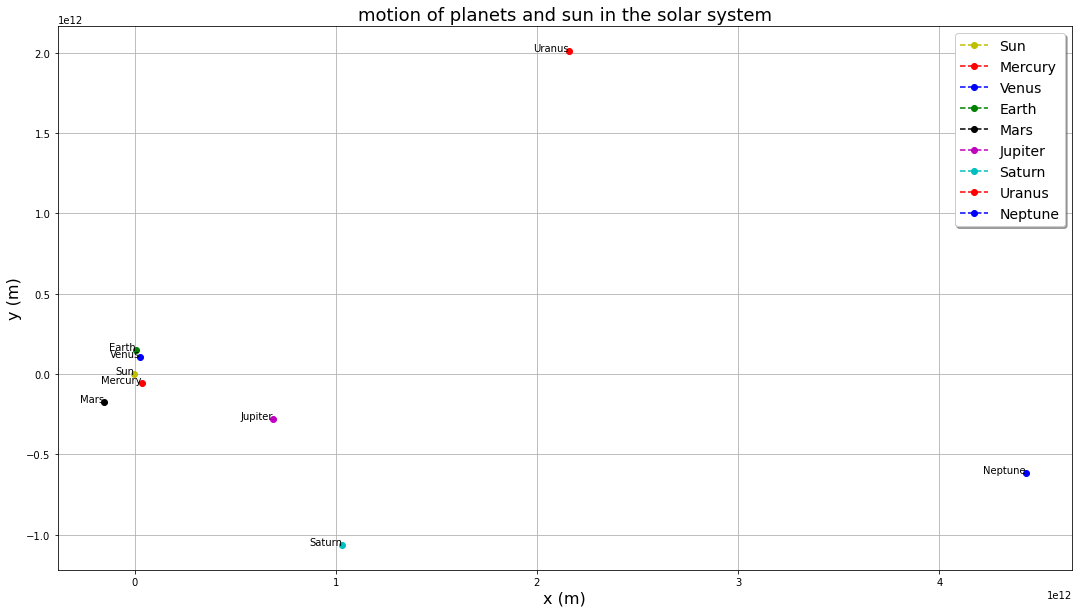

In [29]:
#plot
plot(u2D,nb)

Again, with a short time interval the results are hard to visualize.

Let's look at a planet specifically.

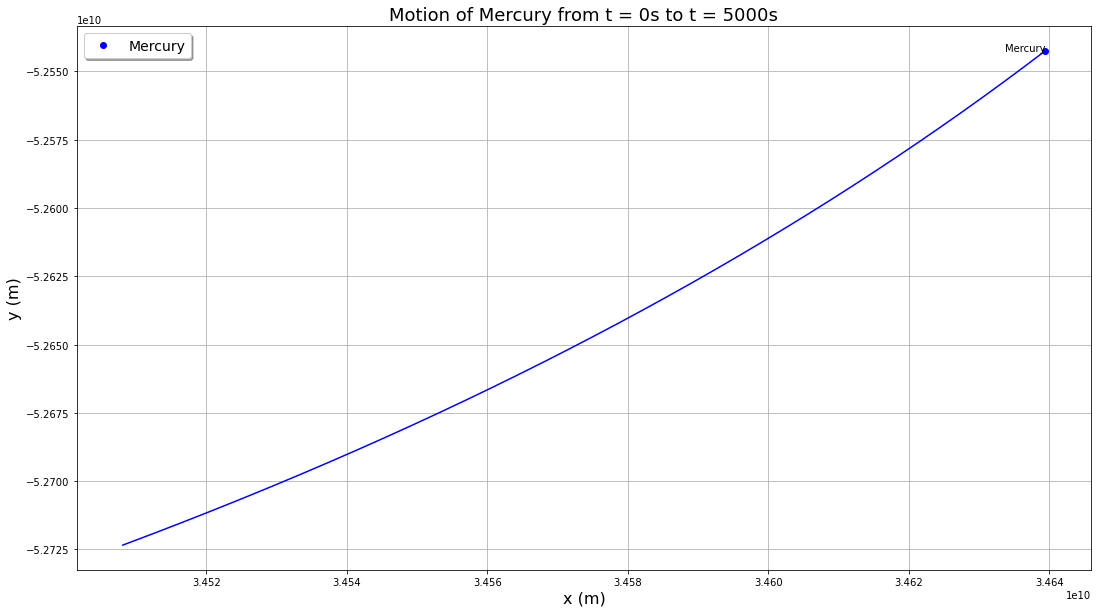

In [31]:
#look at mercury (index 1) specifically
show_planet(1,5000,u2D,nb)

The trajectory appears reasonable, yet still hard to understand if the planet is mothing correctly with repect to others.

#### 5.2.2 Run simulation for a long time

We ran a simulation with N = 1 and t = 86400*30 which is 30 days. It took about 4h to compute. This computation was done on another notebook and the results saved to an .npy file.

In [33]:
if not self_contained:
    
    #import data
    with open('sim_data/1-month-2d-all.npy', 'rb') as f:
        a = numpy.load(f)
        
    #plot
    plot(a,nb)
    

If the above does not work becaus of eccessively large dataset, this is the supposed output:

<img src="images/1-month-2D-all.png" alt="IMG4" width="1000"/>

In [35]:
if not self_contained:
    #plot only inner planets
    fig = plt.figure(figsize=(40,10))
    axes = fig.add_subplot(1,2,1)
    colors = ['y--','r--','b--','g--','k--','m--','c--','r--','b--']
    for body in range(nb-4):
            x = a[-1][body][0]
            y = a[-1][body][1]
            axes.plot(x,y,f'{colors[body]}o',label=BODIES[body])
            axes.text(x,y,'{}'.format(BODIES[body]),horizontalalignment='right')

            x = [time[body][0] for time in a]
            y = [time[body][1] for time in a]
            axes.plot(x,y,colors[body])


    axes.legend(loc='best',shadow=True, fontsize=14)
    axes.set_xlabel('x (m)',fontsize=16)
    axes.set_ylabel('y (m)',fontsize=16)
    axes.grid()
    axes.set_title('motion of planets and sun in the solar system',fontsize=18)
    plt.show()

If the above does not work becaus of eccessively large dataset, this is the supposed output:

<img src="images/1-month-2D-inner.png" alt="IMG5" width="1000"/>

Even with the longer computational times and the 2D system, the results are wrong as seen by the movements of the inner planets. They do however seem to interact with each other with forces of gravitation (notice mars moving towars all the other planets.

### 5.3 Attempt simplified model in 2D

We decided to try a simplified model where:
    * We deciede the intial parameters and constants
    * We decide the number of bodies

#### 5.3.1 Two Bodies

First we attempt the model with two bodies only and some sensible starting values.

In [37]:
MASS = {'Sun': 30, 
        'Earth': 1
       }
BODIES = ['Sun','Earth']
G = 10
nb = len(BODIES)
t_span = [0.,20] 
N = 0.1
u_0 = numpy.array([[0,0,0,0],[10,0,0,-6]])
    
f = lambda t, u, a: F2D(t, u, a, nb, G)

t, u = RK4(f, t_span, u_0, N, nb, G)

In [ ]:
#plot
plot(u,nb)

#### 5.3.2 three Bodies

Since two bodies worked we now attempt with three.

In [38]:
MASS = {'Sun': 20, 
        'Earth': 1,
        'Mars': 1
       }
BODIES = ['Sun','Earth','Mars']
G = 10
nb = len(BODIES)
t_span = [0.,10] 
N = 0.01
u_0 = numpy.array([[0,0,0,0],[10,0,0,-5],[5,0,0,-5]])
    
f = lambda t, u, a: F2D(t, u, a, nb, G)

t, u = RK4(f, t_span, u_0, N, nb, G)

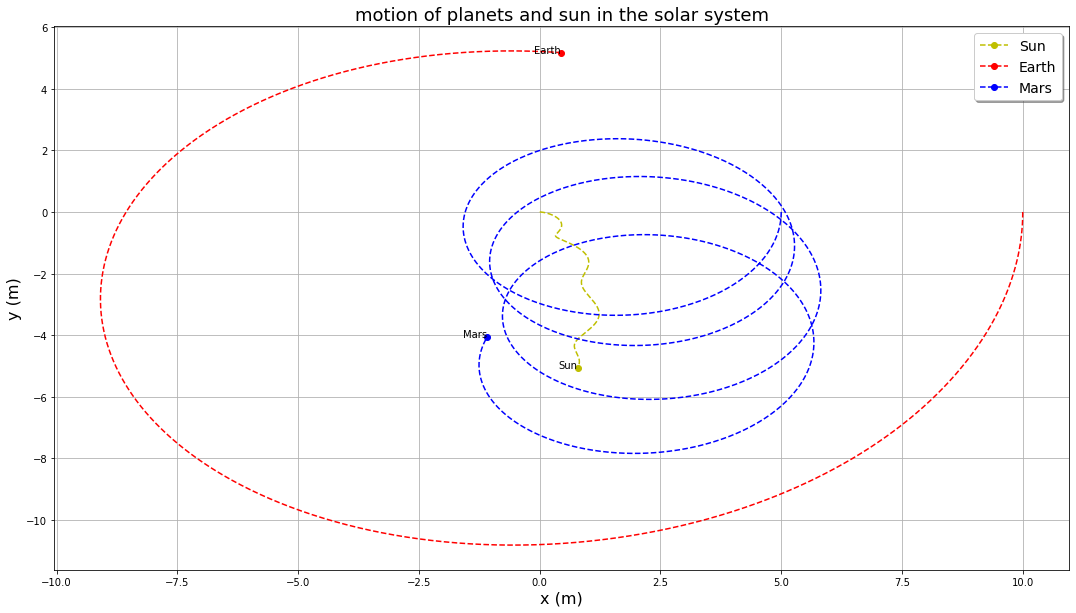

In [39]:
#plot
plot(u,nb)

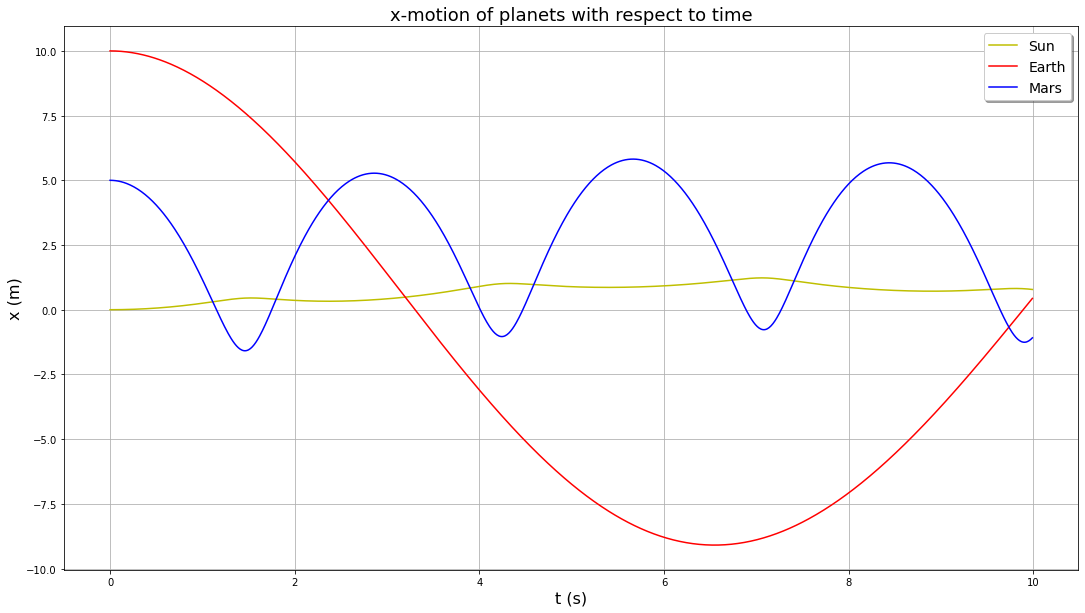

In [40]:
# Motion of bodies with respect to time
fig = plt.figure(figsize=(40,10))
axes = fig.add_subplot(1,2,1)
colors = ['y','r','b','g','k','m','c','r','b']
for body in range(nb):
        x = [time[body][0] for time in u]
        y = [time[body][1] for time in u]
        axes.plot(t,x,colors[body],label=BODIES[body])


axes.legend(loc='best',shadow=True, fontsize=14)
axes.set_xlabel('t (s)',fontsize=16)
axes.set_ylabel('x (m)',fontsize=16)
axes.grid()
axes.set_title('x-motion of planets with respect to time',fontsize=18)
plt.show()

By plotting just the $p_x$ component with repect to time we can observ sinusodial waves.

#### 5.3.3 five Bodies

Now we attempt with five bodies.

In [41]:
MASS = {'Sun': 30, 
        'Earth': 1, 
        'Mars': 0.5, 
        'Jupiter': 5, 
        'Saturn': 3,}
BODIES = ['Sun','Earth','Mars','Jupiter','Saturn']
G = 10
nb = len(BODIES)
t_span = [0.,40] 
N = 0.01
u_0 = numpy.array([[0,0,0,0],[5,0,0,5],[10,0,0,4.],[-15,0,0,-5.],[-20,0,0,-7.]])
    
f = lambda t, u, a: F2D(t, u, a, nb, G)
t, u = RK4(f, t_span, u_0, N, nb, G)

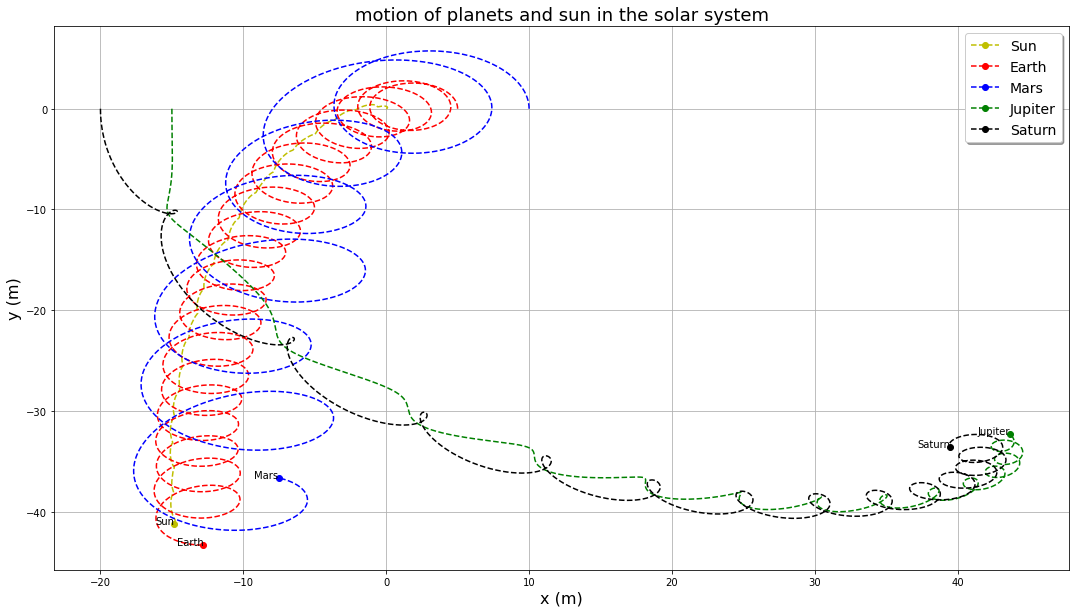

In [42]:
#plot
plot(u,nb)

We get some pretty fascinating results for some starting arameters as seen above. Notice 'Jupiter' and 'Saturn' interacting with each other.

#### 5.3.4 some bad results

However, even with the simplified model, our results still failed.

Below are some exmples that show how chaotic our simulation can be with a small  variation in staring parameters.

##### 5.3.4.a. two bodies: where is earth going?

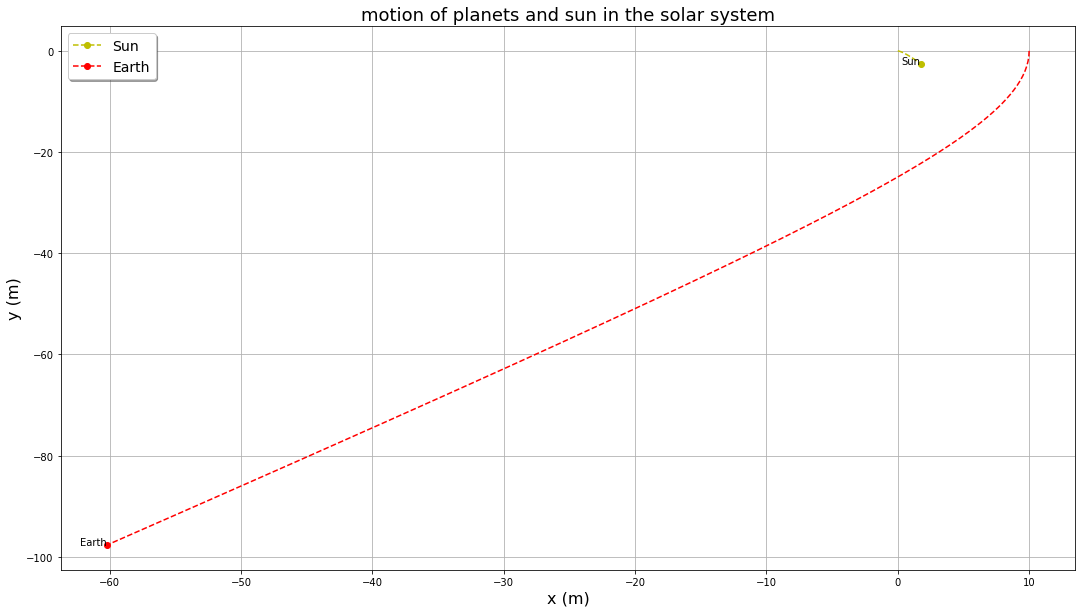

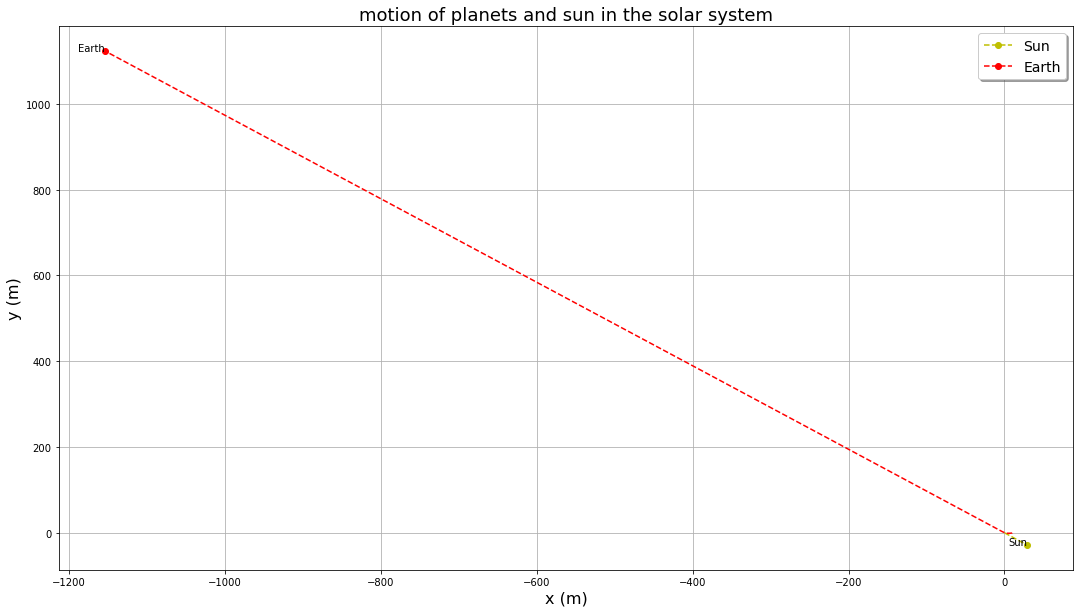

In [43]:
MASS = {'Sun': 40, 
        'Earth': 1
       }
BODIES = ['Sun','Earth']
G = 10
nb = len(BODIES)
t_span = [0.,20] 
N = 0.1
u_0 = numpy.array([[0,0,0,0],[10,0,0,-10]])   
f = lambda t, u, a: F2D(t, u, a, nb, G)
t, u = RK4(f, t_span, u_0, N, nb, G)
plot(u,nb)

#change slightly
u_0 = numpy.array([[0,0,0,0],[10,0,0,-0.9]])   
t, u = RK4(f, t_span, u_0, N, nb, G)
plot(u,nb)

##### 5.3.4.b six bodies: mercury escapes!

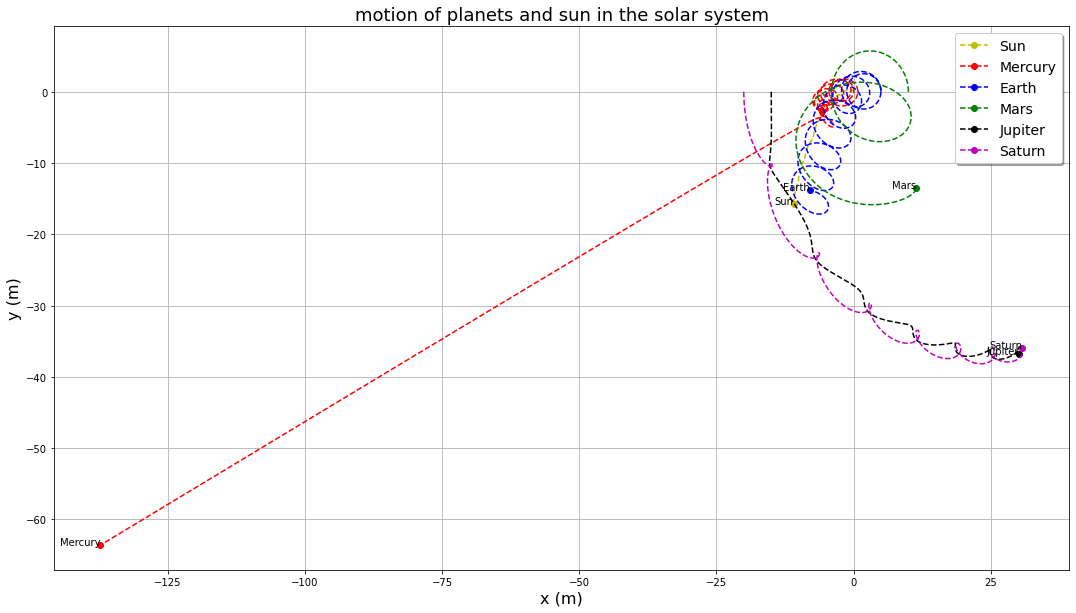

In [44]:
MASS = {'Sun': 30, 
        'Mercury': 0.3, 
        'Venus': 1, 
        'Earth': 1, 
        'Mars': 0.5, 
        'Jupiter': 5, 
        'Saturn': 3, 
        'Uranus': 14.6, 
        'Neptune': 17.2}
BODIES = ['Sun','Mercury','Earth','Mars','Jupiter','Saturn']
G = 10
nb = len(BODIES)
t_span = [0.,20] 
N = 0.01
u_0 = numpy.array([[0,0,0,0],[-5,0,0,-4],[5,0,0,5],[10,0,0,4.],[-15,0,0,-5.],[-20,0,0,-7.]])
    
f = lambda t, u, a: F2D(t, u, a, nb, G)

t, u = RK4(f, t_span, u_0, N, nb, G)
plot(u,nb)

### 5.4 Attempt simplified model in 3D

Due to our simplified model working for some strating values, we decided to run it in 3D. Below are some nice results.

In [45]:
#plotting function 3D
def plot3D(u,nb,a1=30,a2=30):
    '''
    params
    ------
        u: array of arrays of vectors
            solution to our solver
        nb: int
            number of bodies
        a1,a2: int
            angles to view the plot
    '''
    
    fig = plt.figure(figsize=(40,10))
    axes = plt.axes(projection ='3d')
    colors = ['y--','r--','b--','g--','k--','m--','c--','r--','b--']
    for body in range(nb):
            x = u[-1][body][0]
            y = u[-1][body][1]
            z = u[-1][body][2]
            axes.plot(x,y,z,f'{colors[body]}o',label=BODIES[body])
            axes.text(x,y,z,'{}'.format(BODIES[body]),horizontalalignment='right')

            x = [time[body][0] for time in u]
            y = [time[body][1] for time in u]
            z = [time[body][2] for time in u]
            t = [i for i in range(len(u))]
            axes.plot(x,y,z,colors[body])


    axes.legend(loc='best',shadow=True, fontsize=14)
    axes.set_xlabel('x (m)',fontsize=16)
    axes.set_ylabel('y (m)',fontsize=16)
    axes.set_zlabel('z (m)',fontsize=16)
    axes.grid()
    axes.set_title('motion of planets and sun in the solar system 3D',fontsize=18)
    
   
    axes.view_init(a1, a2)
        
    plt.show()

#### 5.4.1 two Bodies

In [46]:
MASS = {'Sun': 30, 
        'Earth': 1
       }
BODIES = ['Sun','Earth']
G = 10
nb = len(BODIES)
t_span = [0.,100] 
N = 0.1
u_0 = numpy.array([[0,0,0,0,0,-3],[10,0,0,0,-6,0.5]])
    
f = lambda t, u, a: F(t, u, a, nb, G)

t, u = RK4(f, t_span, u_0, N, nb, G)

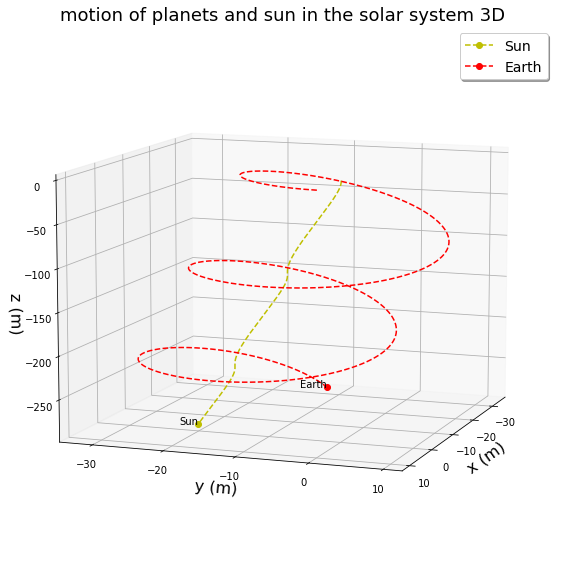

In [47]:
#plot
plot3D(u,nb,10,20)

##### 5.4.1.a Energy for two bodies in 3D

In [48]:
#try with energy

MASS = {'Sun': 30, 
        'Earth': 1
       }
BODIES = ['Sun','Earth']
G = 10# 6.673*10e-11
nb = len(BODIES)
t_span = [0.,10] 
N = 0.001
u_0 = numpy.array([[0,0,0,0,0,0],[10,0,0,0,0,0]])
#u_0 = numpy.array([[0,0,0,0,0,-3],[10,0,0,0,-6,0.5]])
    
f = lambda t, u, a: F(t, u, a, nb, G)

t, u, e3D = RK4_energy(f, t_span, u_0, N, nb, G)


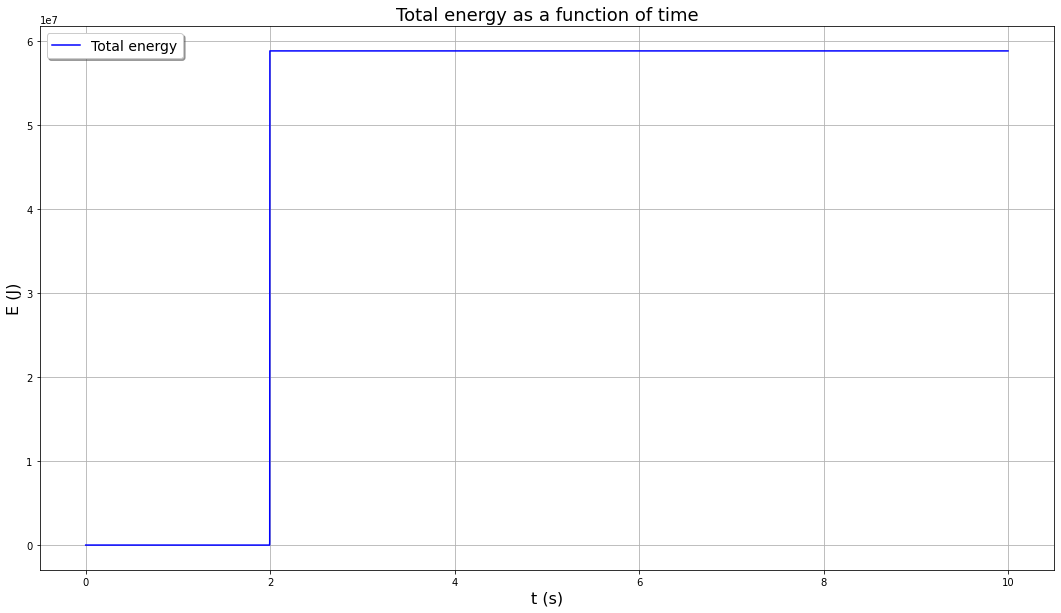

In [49]:
#plot energy as a function of time
fig = plt.figure(figsize=(40,10))
axes = fig.add_subplot(1,2,1)
axes.plot(t,[sum(e) for e in e3D],'b',label='Total energy')           
axes.legend(loc='best',shadow=True, fontsize=14)
axes.set_xlabel('t (s)'.format(N),fontsize=16)
axes.set_ylabel('E (J)',fontsize=16)
axes.grid()
axes.set_title('Total energy as a function of time',fontsize=18)
plt.show()

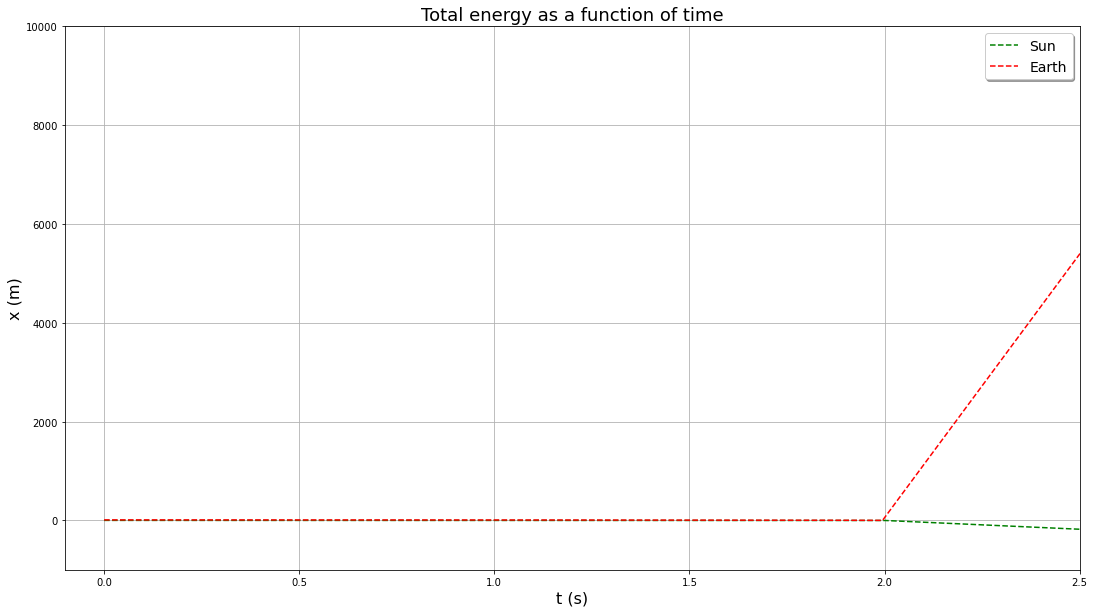

In [50]:
#plot energy as a function of time
fig = plt.figure(figsize=(40,10))
axes = fig.add_subplot(1,2,1)
axes.plot(t,[m[0][0] for m in u],'g--',label=BODIES[0])
axes.plot(t,[m[1][0] for m in u],'r--',label=BODIES[1])
axes.legend(loc='best',shadow=True, fontsize=14)
axes.set_xlabel('t (s)'.format(N),fontsize=16)
axes.set_xlim([-0.1,2.5])
axes.set_ylim([-1000,10000])
axes.set_ylabel('x (m)',fontsize=16)
axes.grid()
axes.set_title('Total energy as a function of time',fontsize=18)
plt.show()

Clearly the model is failing since it reaches two different energy states. The error, as can be seen on the second graph occurs after the two bodies cross paths. See the discussion below for the underflow possibility.

#### 5.4.2 three Bodies

In [51]:
MASS = {'Sun': 20, 
        'Earth': 1,
        'Mars': 1
       }
BODIES = ['Sun','Earth','Mars']
G = 10
nb = len(BODIES)
t_span = [0.,10] 
N = 0.01
u_0 = numpy.array([[0,0,0,0,0,1],[10,0,1,0,-5,-0.5],[5,0,0,0,-5,0]])
    
f = lambda t, u, a: F(t, u, a, nb, G)

t, u = RK4(f, t_span, u_0, N, nb, G)

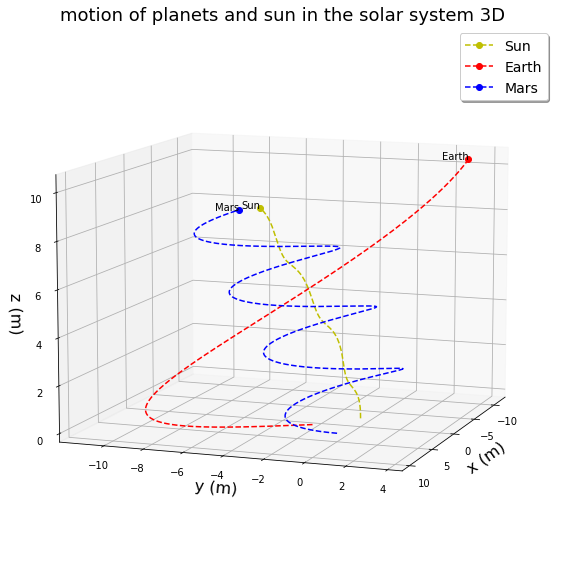

In [52]:
#plot
plot3D(u,nb,10,20)

#### 5.4.3 five Bodies

In [53]:
MASS = {'Sun': 30, 
        'Earth': 1, 
        'Mars': 0.5, 
        'Jupiter': 5, 
        'Saturn': 3,}
BODIES = ['Sun','Earth','Mars','Jupiter','Saturn']
G = 10
nb = len(BODIES)
t_span = [0.,30] 
N = 0.01
u_0 = numpy.array([[0,0,0,0,0,0],[5,0,0,1,5,0.2],[10,1,0,0,4.,-0.2],[-15,0,0,0,-5.,0],[-20,0,0,0,-7.,-0.1]])
#u_0 = numpy.array([[0,0,0.1,0,0,0],[5,0,0,1,5,0],[10,1,0,0,4.,0],[-15,0,0,0,-5.,0],[-20,0,0,0,-7.,0]])


f = lambda t, u, a: F(t, u, a, nb, G)
t, u = RK4(f, t_span, u_0, N, nb, G)

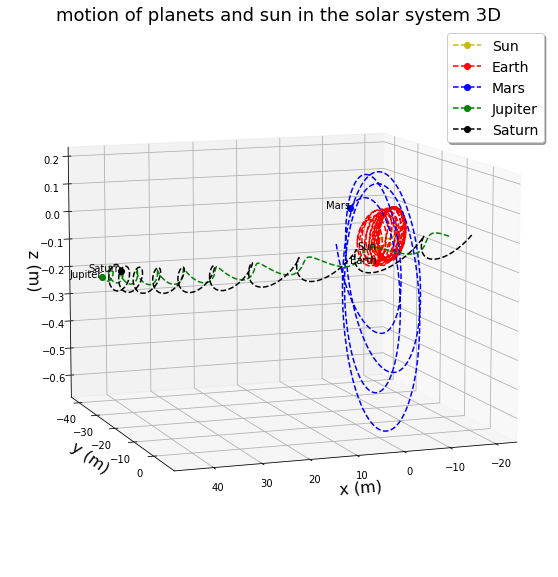

In [54]:
#plot
plot3D(u,nb,10,70)

## Discussion [10 pts]

Discuss the results of your code including 
* Why do you believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


YOUR ANSWER HERE

### Why do you believe that your numerical results are correct (convergence, test cases etc)? Did the project work (in your opinion)?

* We know that our results are not how they should look like. 
     - We compared what we got to the results in the paper we took inspiration from, and noticed they were very different.
     - We noticed that the motion of the planets was unintuitive.
     - The energy analysis provided some good insights into the failures of the project.

### If no:  Explain why your approach did not work

* Our first attempt was to solve our system of ODEs in 3 dimensions (see Section 5.1). 
    - Our graph did not look like we expected it to be, since the trajectories of many planets escaped the system.
    - we ran a very long simulation, in which some planets can be seen acting unnaturally (see Section 5.1.2).
    - We implemented an energy analysis to understand the failures of our system (see Section 5.1.3).
    




* Since our results were not satisfactory, we tried to simply our initial problem into two dimensions, i.e. removing the z-component (see Section 5.2). 
    - Again, the results were unsatisfactory.
    - Planets were still moving in ways that did not look like orbits around the sun. 



* Since neither taking a dimension away, nor shortening the time interval made a significant change to our desired results, we attempted a simplified model in 2D that consisted of two bodies (see Section 5.3).
    - This model looked good, with the caveat that instead of using the masses of the planets provided by our original data, we incorporated our own data. 
    - As seen in figure 5.3.1, the simulation for the motion of planets and sun in the solar system containing the Sun and Earth was a good approximation in comparison to our previous results. 
    - We then added 3 and 5 bodies to the model, we had some good results when adjusted for certain values. 
    - As it can be seen in section 5.3.4, there are still bad results when parameters for the bodies are not carefully chosen. 
 



* Thus, our model is a very unstable since a very small change in the parameters leads to a large change in output trajectories.




* Because the 2D simplified model showed some promising results, taking into consideration the data we manipulated, we tried it in 3 dimensions. 
    - As we had hoped for, some results when using 3 and 5 bodies showed were good.
    - However, using energy analysis we again saw that the total energy of the systme was fluctuating, hence the simulation was not accurate (see Section 5.4.1). 


### 1. Possible failures

To undersdand failures we:

* plotted various functions and used intuition (non eliptical results)

* Used energy analysis (energy not conserved)

* Compared our results to those from the source paper (not similar)

Below are some possible failures for our system.

#### 1.1 Underflow possibility

An underflow error occurs when a number in a calculation is too small to be represented by the CPU or the memory. This could be an error that occurs in our project due to the fact that when we perform our calculations we get such small numbers that these can not be represented by the memory. Below we can see that the closer the Earth goes to the Sun, the smaller the distance is (see after 3 seconds). Eventually the distance becomes so small that we might encounter a underflow error.

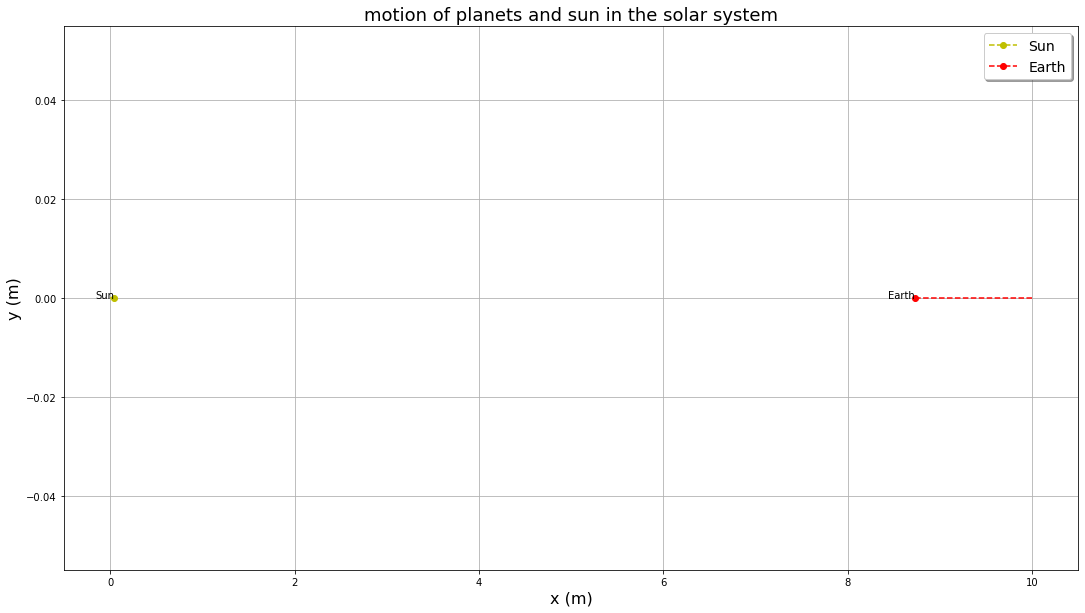

In [55]:
MASS = {'Sun': 30, 
        'Earth': 1
       }
BODIES = ['Sun','Earth']
G = 10#6.673*10e-11
nb = len(BODIES)
t_span = [0.,1] 
N = 0.1
#u_0 = numpy.array([[0,0,0,0,0,-3],[10,0,0,0,-6,0.5]])
u_0 = numpy.array([[0,0,0,0,0,0],[10,0,0,0,0,0]])
    
f = lambda t, u, a: F(t, u, a, nb, G)
t, u = RK4(f, t_span, u_0, N, nb, G)
plot(u,nb)

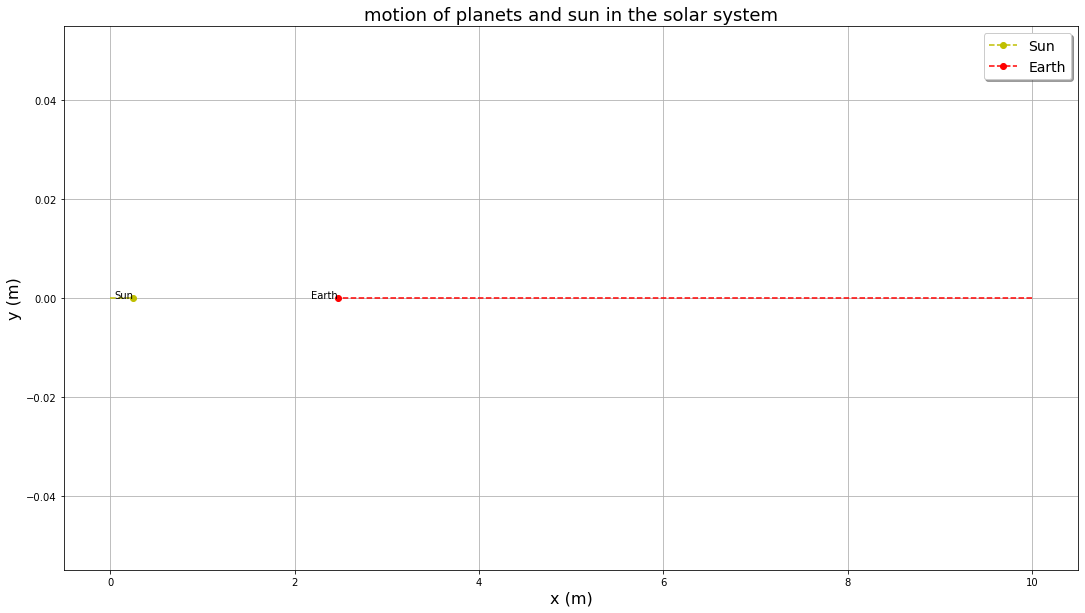

In [56]:
t_span = [0.,2]
t, u = RK4(f, t_span, u_0, N, nb, G)
plot(u,nb)

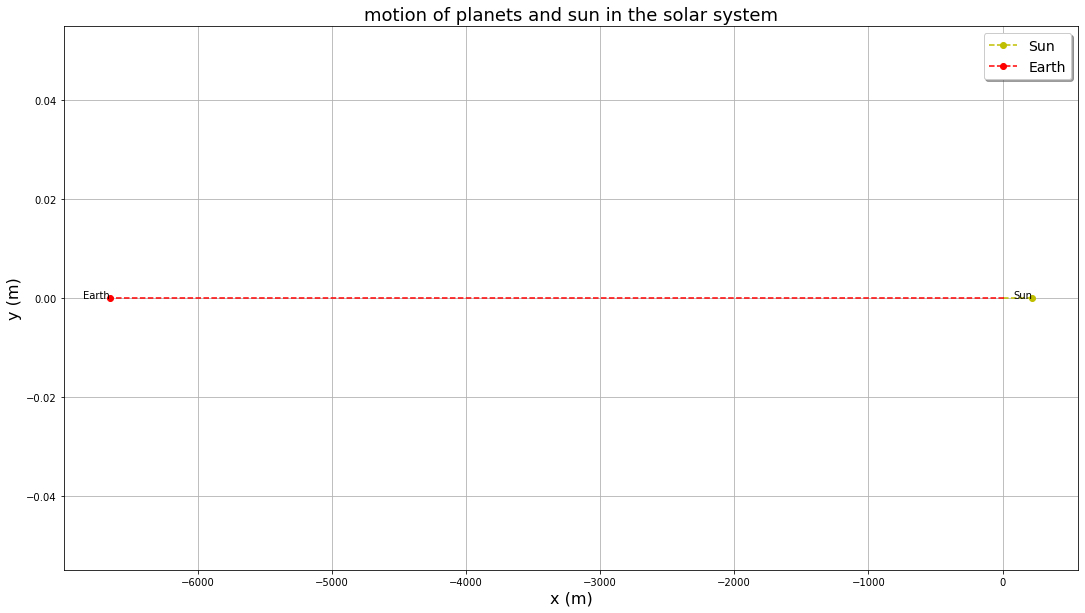

In [57]:
t_span = [0.,3]
t, u = RK4(f, t_span, u_0, N, nb, G)
plot(u,nb)

As can be seen, in the 3rd second of the simulation the earth and sun meet. After the "collision", the earth moves $>6000m$ which is incorrect.

#### 1.2 Time step problems

One possibility that explains  planets blowing off in our system is time step problem. When two bodies are very close, the distance $r$ is very close to 0. The acceleration ( $Gm_j \frac{x_j-x_{\alpha}}{(r_{j, \alpha})^3}$ ) at the instants where the bodies are close is very large. Hence the acceleration the body undergoes is massive. If our time step is too large, the body keeps accelerating at the given acceleration for a very long time and escapes from the system. A smaller time step would update the accelleration more often, hence less chance of the planet excaping.

An example is outlined above. We took a simplified 2D 2-body problem. We run the system for 1 second. Earth is moving towards the Sun, as expected due to the attraction. After 2 seconds the Earth continues to approach the Sun, as we would also expect. However, after 3 seconds, the bodies are so close to each other that the Earth blows off and travels a very big distance in a short time period, i.e. 6000m. 

### What we would do differently next time

* Our implementation of RK4 made it tricky to test. For example, numpy's solve_ivp would not accept our imput parameters. Perhaps we could create a better setup that can be easily tested.

* We could implement adaptive time stepping for our RK4 method. In our case we chose time intervals by trial and error and from what was suggested in the source paper. However, devising a strategy for adaptive time stepping would be an imporvement for next time.

* Since methods like RK4 are not guaranteed to obey energy conservation, we could experiment with different methods. Energy conservation is essential in modelling planetary motion, even at the cost of predicting trajectories perfectly. An example would be using symplectic integrators (https://en.wikipedia.org/wiki/Symplectic_integrator). These methods are better suited for physical modelling.